# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


# Importation of packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Importation of dataset locally

In [3]:
bike_df = pd.read_csv('electric_bike_ratings_2212.csv')
print(bike_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1350 non-null   object 
 4   reviewer_age     1500 non-null   object 
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   object 
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 93.9+ KB
None


# Checking and resolving missing data

In [4]:
print(bike_df.isna().sum())

owned                0
make_model           0
review_month         0
web_browser        150
reviewer_age         0
primary_use          0
value_for_money      0
overall_rating       0
dtype: int64


In [5]:
bike_df['web_browser'] = bike_df.web_browser.fillna('unknown')
bike_df.web_browser.value_counts() #to verify the filling of the missing values

Chrome     698
IE         239
Firefox    233
unknown    150
Safari     133
Opera       24
Android     23
Name: web_browser, dtype: int64

# Resolving data description of featues

In [6]:
#verifying some features
print(bike_df['owned'].value_counts())
print(bike_df['make_model'].value_counts())
print(bike_df['primary_use'].value_counts())

1    890
0    610
Name: owned, dtype: int64
Nielah-Eyden     652
Lunna-Eyden      329
Lunna-Keetra     178
Hoang-Keetra     124
Hoang-Eyden      124
Nielah-Keetra     93
Name: make_model, dtype: int64
Commuting    1095
Leisure       405
Name: primary_use, dtype: int64


###  working on the reviewer_age, value_for_money and review_month features

In [6]:
bike_df.reviewer_age = bike_df.reviewer_age.str.replace('-', '0').astype('Float64')
bike_df.reviewer_age = bike_df.reviewer_age.replace(0, np.nan, inplace= False)
age_mean = bike_df.reviewer_age.mean()
bike_df.reviewer_age = bike_df.reviewer_age.fillna(age_mean, inplace = False)
bike_df.reviewer_age = bike_df.reviewer_age.astype('Int64')
bike_df

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,unknown,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,23-Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,07-Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,16-Sep,Chrome,33,Leisure,5/10,12.29
...,...,...,...,...,...,...,...,...
1495,1,Nielah-Eyden,18-May,Chrome,32,Leisure,6/10,18.76
1496,1,Nielah-Eyden,11-Mar,unknown,39,Commuting,5/10,18.56
1497,1,Nielah-Eyden,10-Nov,Chrome,21,Commuting,8/10,20.22
1498,0,Nielah-Eyden,Nov,Safari,45,Commuting,3/10,18.51


In [8]:
bike_df.value_for_money = bike_df.value_for_money.str.replace('/10', '')
bike_df.value_for_money = bike_df.value_for_money.astype('Int64')
bike_df

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5,18.62
1,0,Nielah-Keetra,Jun,unknown,24,Commuting,4,15.55
2,0,Lunna-Keetra,23-Oct,Chrome,28,Commuting,5,12.76
3,1,Hoang-Keetra,07-Nov,IE,41,Leisure,5,17.07
4,1,Lunna-Keetra,16-Sep,Chrome,33,Leisure,5,12.29
...,...,...,...,...,...,...,...,...
1495,1,Nielah-Eyden,18-May,Chrome,-,Leisure,6,18.76
1496,1,Nielah-Eyden,11-Mar,unknown,39,Commuting,5,18.56
1497,1,Nielah-Eyden,10-Nov,Chrome,21,Commuting,8,20.22
1498,0,Nielah-Eyden,Nov,Safari,45,Commuting,3,18.51


In [9]:
bike_df.review_month = bike_df.review_month.str.strip()
bike_df.review_month = bike_df.review_month.str.replace(r'..-', '', regex = True)
bike_df.review_month.value_counts()

Sep    141
Mar    141
May    138
Nov    126
Jan    126
Oct    125
Jun    124
Apr    123
Dec    117
Feb    115
Aug    114
Jul    110
Name: review_month, dtype: int64

In [10]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1500 non-null   object 
 4   reviewer_age     1500 non-null   object 
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   Int64  
 7   overall_rating   1500 non-null   float64
dtypes: Int64(1), float64(1), int64(1), object(5)
memory usage: 95.3+ KB


## Task 1 
### **Columns:**
**owned**: The value match the column description. No missing values. Nothing to do since the column is perfect.

**make_model**: The value match the column description. No missing values. Nothing to do since the coplumn is perfect.

**review_month**: The value match the column description but some values with date and some without which is our goal. No missing values. The values were edited and corrected using string replacement using the python regex.

**web_browser**: The value match the column description. 150 missing values which was resloved by filling in the blank fields with 'unknown' using fillna(). Nothing to do since the column description is fine.

**reviewer_age**: The value did not match the column description. No missing values. The fields with '-' were replaced by '0', the whole column was then converted from string to float data type. The 0 values were then replaced by NaN, mean value was calculated and filled in to the now NaN fields. Hence, the column was converted to integer values as required.

**primary_use**: The value match the column description. No missing values. Nothing to do since the coplumn is perfect.

**value_for_money**: The value did not match the column description. No missing values. The '/10' were replaced by empty string ('') with the help of str.replace(). The values were then converted to integer as required.

**overall_rating**: The value match the column description. No missing values. Nothing to do since the coplumn is perfect.

## Task 2
Visualization of reviews from owners and non-owners group.

a. According to the bar plot above, the number of observation 1s are more than 0s with 890 and 610 respectively.

In [11]:
bike_df.owned.value_counts(normalize = True)

1    0.593333
0    0.406667
Name: owned, dtype: float64

b. From the figures above, we can conclude that observations are not uniformly balanced across the categories of the owned variable.

(array([ 88.,  46.,  52.,  46.,  41.,  40.,  43.,  39.,  38.,  39.,  38.,
         36.,  35.,  45.,  36., 135.,  71.,  31.,  39.,  45.,  28.,  45.,
         45.,  51.,  37.,  36.,  46.,  50.,  41.,  37.,  42.,  59.]),
 array([16.    , 17.0625, 18.125 , 19.1875, 20.25  , 21.3125, 22.375 ,
        23.4375, 24.5   , 25.5625, 26.625 , 27.6875, 28.75  , 29.8125,
        30.875 , 31.9375, 33.    , 34.0625, 35.125 , 36.1875, 37.25  ,
        38.3125, 39.375 , 40.4375, 41.5   , 42.5625, 43.625 , 44.6875,
        45.75  , 46.8125, 47.875 , 48.9375, 50.    ]),
 <BarContainer object of 32 artists>)

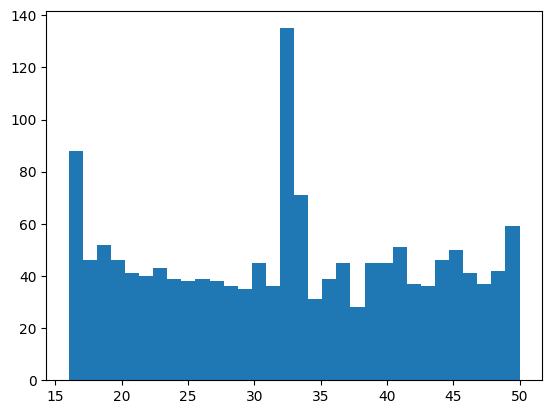

In [12]:
plt.hist(bike_df.reviewer_age, bins = 32)

NameError: name 'bike_df' is not defined

From the graph above, people aged 32 gave more review more than the other respective age groups.

In [14]:
print(bike_df.reviewer_age.value_counts(normalize= True).head(3))
print(bike_df.reviewer_age.value_counts().head(3))


32        0.09
19    0.034667
41       0.034
Name: reviewer_age, dtype: Float64
32    135
19     52
41     51
Name: reviewer_age, dtype: Int64


age group 32 gave 135 reviews and percentage of 9% as the most contributing age group to the total reviews.

## Task 3
Distribution of the overall rating across the owned variable.

<AxesSubplot: xlabel='owned', ylabel='overall_rating'>

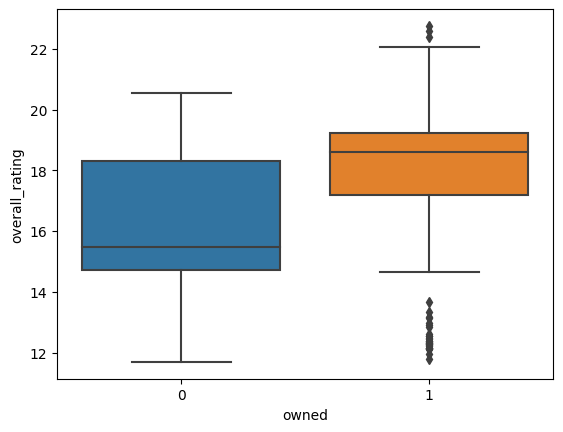

In [15]:
sns.boxplot(y= 'overall_rating', x = 'owned', data = bike_df)

According to the boxplot above, the  most values of overall_rating of the owners category is higher than that of non-owners. The median rating value of owners is also higher than that of non-owners. The lowest value outlier of the owners category is almost the same as the lowest values of non-owners value range.

## Task 4
The relationship and plot of the owned and overall_rating variable

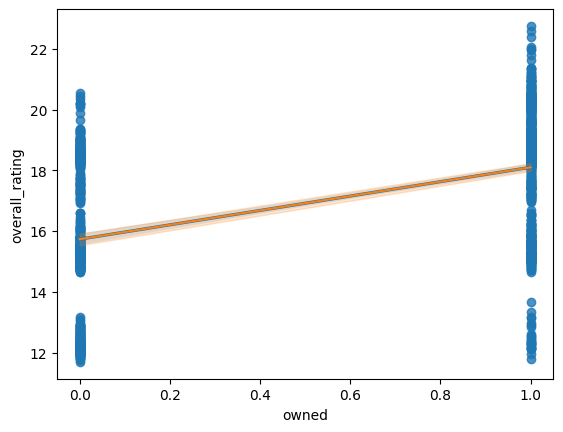

In [16]:
#sns.histplot(x = 'owned', y = 'overall_rating', data = bike_df)
#sns.relplot(x = 'owned', y = 'overall_rating', data = bike_df, kind = 'line')
sns.regplot(x = 'owned', y = 'overall_rating', data = bike_df)
sns.lineplot(x = 'owned', y = 'overall_rating', data = bike_df)
#plt.scatter(bike_df.owned, bike_df.overall_rating)
plt.show()

From the plot above, it is possible to conclude onwers will leave a higher review comparedd to non-owners.

## Task 5
The type of machine learning for this problem is classification since the goal is to predict the outcome from a range of 2 possible outcomes i.e to predict if a review came from an owner or not.

# Preparing and converting categorical values to numerical for modelling.

In [17]:
print(bike_df.columns)
print(bike_df.info())

Index(['owned', 'make_model', 'review_month', 'web_browser', 'reviewer_age',
       'primary_use', 'value_for_money', 'overall_rating'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1500 non-null   object 
 4   reviewer_age     1500 non-null   Int64  
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   Int64  
 7   overall_rating   1500 non-null   float64
dtypes: Int64(2), float64(1), int64(1), object(4)
memory usage: 96.8+ KB
None


In [18]:
#converting categrical values to numerical as required
bike_convert = pd.get_dummies(bike_df, columns = ['make_model', 'review_month', 'web_browser', 'primary_use'])
bike_convert = bike_convert.drop(columns= ['owned', 'reviewer_age', 'value_for_money', 'overall_rating'], axis = 1)
print(bike_convert.shape)
print(bike_convert.columns)

(1500, 27)
Index(['make_model_Hoang-Eyden', 'make_model_Hoang-Keetra',
       'make_model_Lunna-Eyden', 'make_model_Lunna-Keetra',
       'make_model_Nielah-Eyden', 'make_model_Nielah-Keetra',
       'review_month_Apr', 'review_month_Aug', 'review_month_Dec',
       'review_month_Feb', 'review_month_Jan', 'review_month_Jul',
       'review_month_Jun', 'review_month_Mar', 'review_month_May',
       'review_month_Nov', 'review_month_Oct', 'review_month_Sep',
       'web_browser_Android', 'web_browser_Chrome', 'web_browser_Firefox',
       'web_browser_IE', 'web_browser_Opera', 'web_browser_Safari',
       'web_browser_unknown', 'primary_use_Commuting', 'primary_use_Leisure'],
      dtype='object')


In [19]:
bike_concat = pd.concat([bike_df, bike_convert], axis = 1)
print(bike_concat.shape)
print(bike_concat.columns)

(1500, 35)
Index(['owned', 'make_model', 'review_month', 'web_browser', 'reviewer_age',
       'primary_use', 'value_for_money', 'overall_rating',
       'make_model_Hoang-Eyden', 'make_model_Hoang-Keetra',
       'make_model_Lunna-Eyden', 'make_model_Lunna-Keetra',
       'make_model_Nielah-Eyden', 'make_model_Nielah-Keetra',
       'review_month_Apr', 'review_month_Aug', 'review_month_Dec',
       'review_month_Feb', 'review_month_Jan', 'review_month_Jul',
       'review_month_Jun', 'review_month_Mar', 'review_month_May',
       'review_month_Nov', 'review_month_Oct', 'review_month_Sep',
       'web_browser_Android', 'web_browser_Chrome', 'web_browser_Firefox',
       'web_browser_IE', 'web_browser_Opera', 'web_browser_Safari',
       'web_browser_unknown', 'primary_use_Commuting', 'primary_use_Leisure'],
      dtype='object')


In [20]:
bike_final = bike_concat.drop(columns  = ['make_model', 'review_month', 'web_browser', 'primary_use'], axis = 1)
print(bike_final.shape)
bike_final

(1500, 31)


,owned,reviewer_age,value_for_money,overall_rating,make_model_Hoang-Eyden,make_model_Hoang-Keetra,make_model_Lunna-Eyden,make_model_Lunna-Keetra,make_model_Nielah-Eyden,make_model_Nielah-Keetra,review_month_Apr,review_month_Aug,review_month_Dec,review_month_Feb,review_month_Jan,review_month_Jul,review_month_Jun,review_month_Mar,review_month_May,review_month_Nov,review_month_Oct,review_month_Sep,web_browser_Android,web_browser_Chrome,web_browser_Firefox,web_browser_IE,web_browser_Opera,web_browser_Safari,web_browser_unknown,primary_use_Commuting,primary_use_Leisure
0,1,23,5,18.62,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
1,0,24,4,15.55,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,0,28,5,12.76,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
3,1,41,5,17.07,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,1,33,5,12.29,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1,32,6,18.76,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
1496,1,39,5,18.56,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
1497,1,21,8,20.22,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1498,0,45,3,18.51,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [21]:
print(bike_final.columns)
bike_final.shape

Index(['owned', 'reviewer_age', 'value_for_money', 'overall_rating',
       'make_model_Hoang-Eyden', 'make_model_Hoang-Keetra',
       'make_model_Lunna-Eyden', 'make_model_Lunna-Keetra',
       'make_model_Nielah-Eyden', 'make_model_Nielah-Keetra',
       'review_month_Apr', 'review_month_Aug', 'review_month_Dec',
       'review_month_Feb', 'review_month_Jan', 'review_month_Jul',
       'review_month_Jun', 'review_month_Mar', 'review_month_May',
       'review_month_Nov', 'review_month_Oct', 'review_month_Sep',
       'web_browser_Android', 'web_browser_Chrome', 'web_browser_Firefox',
       'web_browser_IE', 'web_browser_Opera', 'web_browser_Safari',
       'web_browser_unknown', 'primary_use_Commuting', 'primary_use_Leisure'],
      dtype='object')


(1500, 31)

## Task 6
Choosing and fitting a baseline model

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = bike_final.drop('owned', axis = 1).values
y = bike_final['owned'].values
print(X.shape, y.shape)

logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 123)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred

(1500, 30) (1500,)


array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,

## Task 7
Choosing and fitting a comparative model

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred_knn= knn.predict(X_test)
y_pred_knn

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,

## Task 8
Logistic regression is easier to implement, interpret, and very efficient to train. It is very fast at classifying unknown records. It performs well when the dataset is linearly separable.

The KNN algorithm can compete with the most accurate models because it makes highly accurate predictions. Since the hyperparameter can be tuned, a user can alter its performance but it costs computation and processing time especially when working with large datasets.

## Task 9
Model Performance

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred)) # logistic regression model performance
print(classification_report(y_test, y_pred_knn)) # the knn model performance

              precision    recall  f1-score   support

           0       0.74      0.63      0.68       150
           1       0.77      0.85      0.81       225

    accuracy                           0.76       375
   macro avg       0.76      0.74      0.75       375
weighted avg       0.76      0.76      0.76       375

              precision    recall  f1-score   support

           0       0.67      0.61      0.64       150
           1       0.76      0.80      0.78       225

    accuracy                           0.73       375
   macro avg       0.71      0.71      0.71       375
weighted avg       0.72      0.73      0.72       375



## Task 10
From the classification report, the logistic regression has accuracy score of 0.76 while the knn has the score of 0.73. Same applied to other scores like precision, recall and f1-score. Hence, the best model among the problem is the logistic regression.

Accuracy: The logistic regression has 76% probability of predicting the right outcome accurately while the knn model has accuracy of 73%.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam